In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


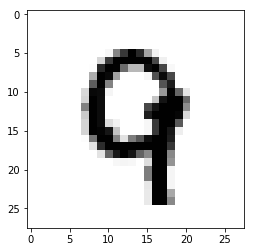

9


In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

exampleindex = 334
digitimage = x_train[exampleindex]
digitlabel = y_train[exampleindex]

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.show()
print(digitlabel)

In [4]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(28 * 28,), activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1s 19us/step - loss: 1.0028 - acc: 0.7698 - val_loss: 0.6081 - val_acc: 0.8617
Epoch 2/2
60000/60000 [==============================] - 1s 19us/step - loss: 0.5584 - acc: 0.8628 - val_loss: 0.4808 - val_acc: 0.8808


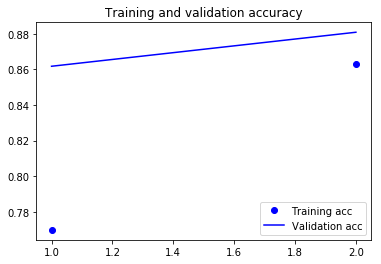

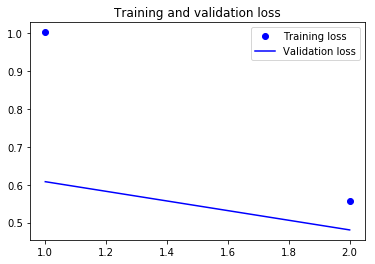

In [7]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
print(model.predict(digitimage.reshape(-1, 28*28)))

[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 6.785761e-28
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]]
